Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     57.999  0.785    56.393     59.475      0.016    0.012    2451.0   
sigma   2.366  0.682     1.347      3.737      0.015    0.011    2346.0   

       ess_tail  r_hat  
mu       1904.0    1.0  
sigma    2222.0    1.0  


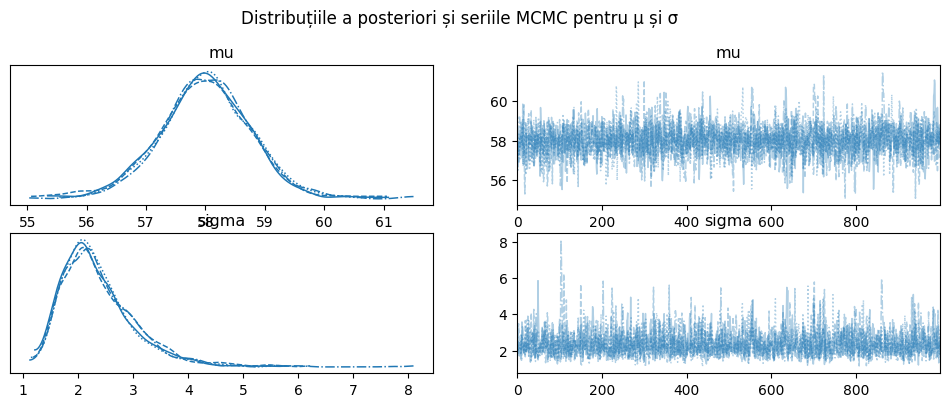

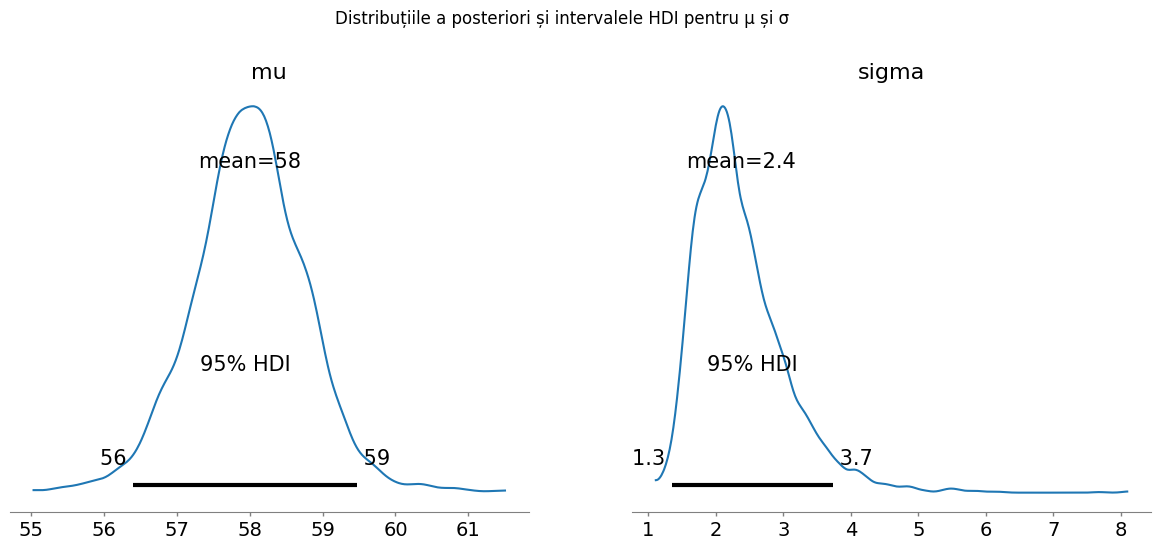

In [15]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

zgomot = [56, 60, 58, 55, 57, 59, 61, 56, 58, 60]
x = np.mean(zgomot)

with pm.Model() as model:
    mu = pm.Normal("mu", mu=x, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    X_obs = pm.Normal("X_obs", mu=mu, sigma=sigma, observed=zgomot)
    trace = pm.sample(1000, return_inferencedata=True)

summary = az.summary(trace, hdi_prob=0.95)
print(summary)

az.plot_trace(trace)
plt.suptitle("Distribuțiile a posteriori și seriile MCMC pentru μ și σ", y=1.02)
plt.show()

az.plot_posterior(trace, hdi_prob=0.95)
plt.suptitle("Distribuțiile a posteriori și intervalele HDI pentru μ și σ", y=1.02)
plt.show()
